In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [52]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')


In [4]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [100]:
test_df
test_df.shape


(2671, 10)

In [53]:
big_data =pd.concat([train_df,test_df],axis=0)
#big_data = train_df.append(test_df,sort=False)

In [9]:
big_data.shape

(13354, 11)

In [89]:
big_data.dtypes


Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Dept_Hour            int32
Dept_Mins            int32
Arrival_Hour         int32
Arrival_Mins         int32
dtype: object

### Feature Engineering

In [54]:
big_data['Date']= big_data['Date_of_Journey'].str.split('/').str[0]

In [55]:
big_data['Month']= big_data['Date_of_Journey'].str.split('/').str[1]
big_data['Year']= big_data['Date_of_Journey'].str.split('/').str[2]

In [149]:
big_data.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dept_Hour,Dept_Mins,Arrival_Hour,Arrival_Mins,Route_1,Route_2,Route_3,Route_4,Route_5,Destinaiton
0,3,0,5,0,8,3897,24,3,2019,22,20,1,10,0,13,24,12,4,5
1,1,3,0,2,8,7662,1,5,2019,5,50,13,15,2,25,1,3,4,0
2,4,2,1,2,8,13882,9,6,2019,9,25,4,25,3,32,4,5,4,1
3,3,3,0,1,8,6218,12,5,2019,18,5,23,30,2,34,3,12,4,0
4,3,0,5,1,8,13302,1,3,2019,16,50,21,35,0,34,8,12,4,5


In [56]:
big_data = big_data.drop(['Date_of_Journey'],axis=1)

In [57]:
big_data["Date"] = big_data["Date"].astype(int)
big_data["Month"] = big_data["Month"].astype(int)
big_data["Year"] = big_data["Year"].astype(int)

In [58]:
big_data['Arrival_Time'] = big_data['Arrival_Time'].str.split(' ').str[0]

In [59]:
big_data['Dept_Hour']  = big_data['Dep_Time'].str.split(':').str[0]
big_data['Dept_Mins ']  = big_data['Dep_Time'].str.split(':').str[1]


In [64]:
big_data['Arrival_Hour']  = big_data['Arrival_Time'].str.split(':').str[0]
big_data['Arrival_Mins ']  = big_data['Arrival_Time'].str.split(':').str[1]

In [76]:
big_data["Dept_Hour"] = big_data["Dept_Hour"].astype(int)
big_data["Dept_Mins "] = big_data["Dept_Mins "].astype(int)
big_data["Arrival_Hour"] = big_data["Arrival_Hour"].astype(int)
big_data["Arrival_Mins "] = big_data["Arrival_Mins "].astype(int)



In [77]:
big_data = big_data.drop(['Arrival_Time','Dep_Time'],axis=1)

0       20
1       50
2       25
3        5
4       50
        ..
2666    30
2667    20
2668    50
2669     0
2670    55
Name: Dept_Mins , Length: 13354, dtype: int32

In [96]:
big_data['Total_Stops'] = big_data['Total_Stops'].replace('0 stops' , '0')

In [81]:
big_data['Total_Stops']  = big_data['Total_Stops'].str.split(' ').str[0]


In [86]:
big_data["Total_Stops"]=big_data["Total_Stops"].fillna(1)


In [98]:
big_data['Total_Stops']=big_data["Total_Stops"].astype(int)

In [101]:
big_data['Route_1'] = big_data['Route'].str.split('→ ').str[0]
big_data['Route_2'] = big_data['Route'].str.split('→ ').str[1]
big_data['Route_3'] = big_data['Route'].str.split('→ ').str[2]
big_data['Route_4'] = big_data['Route'].str.split('→ ').str[3]
big_data['Route_5'] = big_data['Route'].str.split('→ ').str[4]


In [110]:
big_data['Price'] = big_data['Price'].fillna(big_data['Price'].mean)

In [114]:
big_data['Route_1'] = big_data['Route_1'].fillna(0)
big_data['Route_2'] = big_data['Route_2'].fillna(0)
big_data['Route_3'] = big_data['Route_3'].fillna(0)
big_data['Route_4'] = big_data['Route_4'].fillna(0)
big_data['Route_5'] = big_data['Route_5'].fillna(0)

In [129]:
big_data['Route_1'] = big_data['Route_1'].replace(0,'None')
big_data['Route_2'] = big_data['Route_2'].replace(0,'None')
big_data['Route_3'] = big_data['Route_3'].replace(0,'None')
big_data['Route_4'] = big_data['Route_4'].replace(0,'None')
big_data['Route_5'] = big_data['Route_5'].replace(0,'None')



In [117]:
big_data =big_data.drop(['Route'],axis=1)

In [119]:
big_data =big_data.drop(['Duration'],axis=1)



In [150]:
big_data =big_data.drop(['Destinaiton'],axis=1)



In [120]:
big_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dept_Hour          0
Dept_Mins          0
Arrival_Hour       0
Arrival_Mins       0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [122]:
encoder = LabelEncoder()

In [132]:
big_data['Airline']=encoder.fit_transform(big_data['Airline'])
big_data['Source']=encoder.fit_transform(big_data['Source'])
big_data['Destination']=encoder.fit_transform(big_data['Destination'])
big_data['Additional_Info']=encoder.fit_transform(big_data['Additional_Info'])

big_data['Route_1']=encoder.fit_transform(big_data['Route_1'])
big_data['Route_2']=encoder.fit_transform(big_data['Route_2'])
big_data['Route_3']=encoder.fit_transform(big_data['Route_3'])
big_data['Route_4']=encoder.fit_transform(big_data['Route_4'])
big_data['Route_5']=encoder.fit_transform(big_data['Route_5'])







In [125]:
big_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

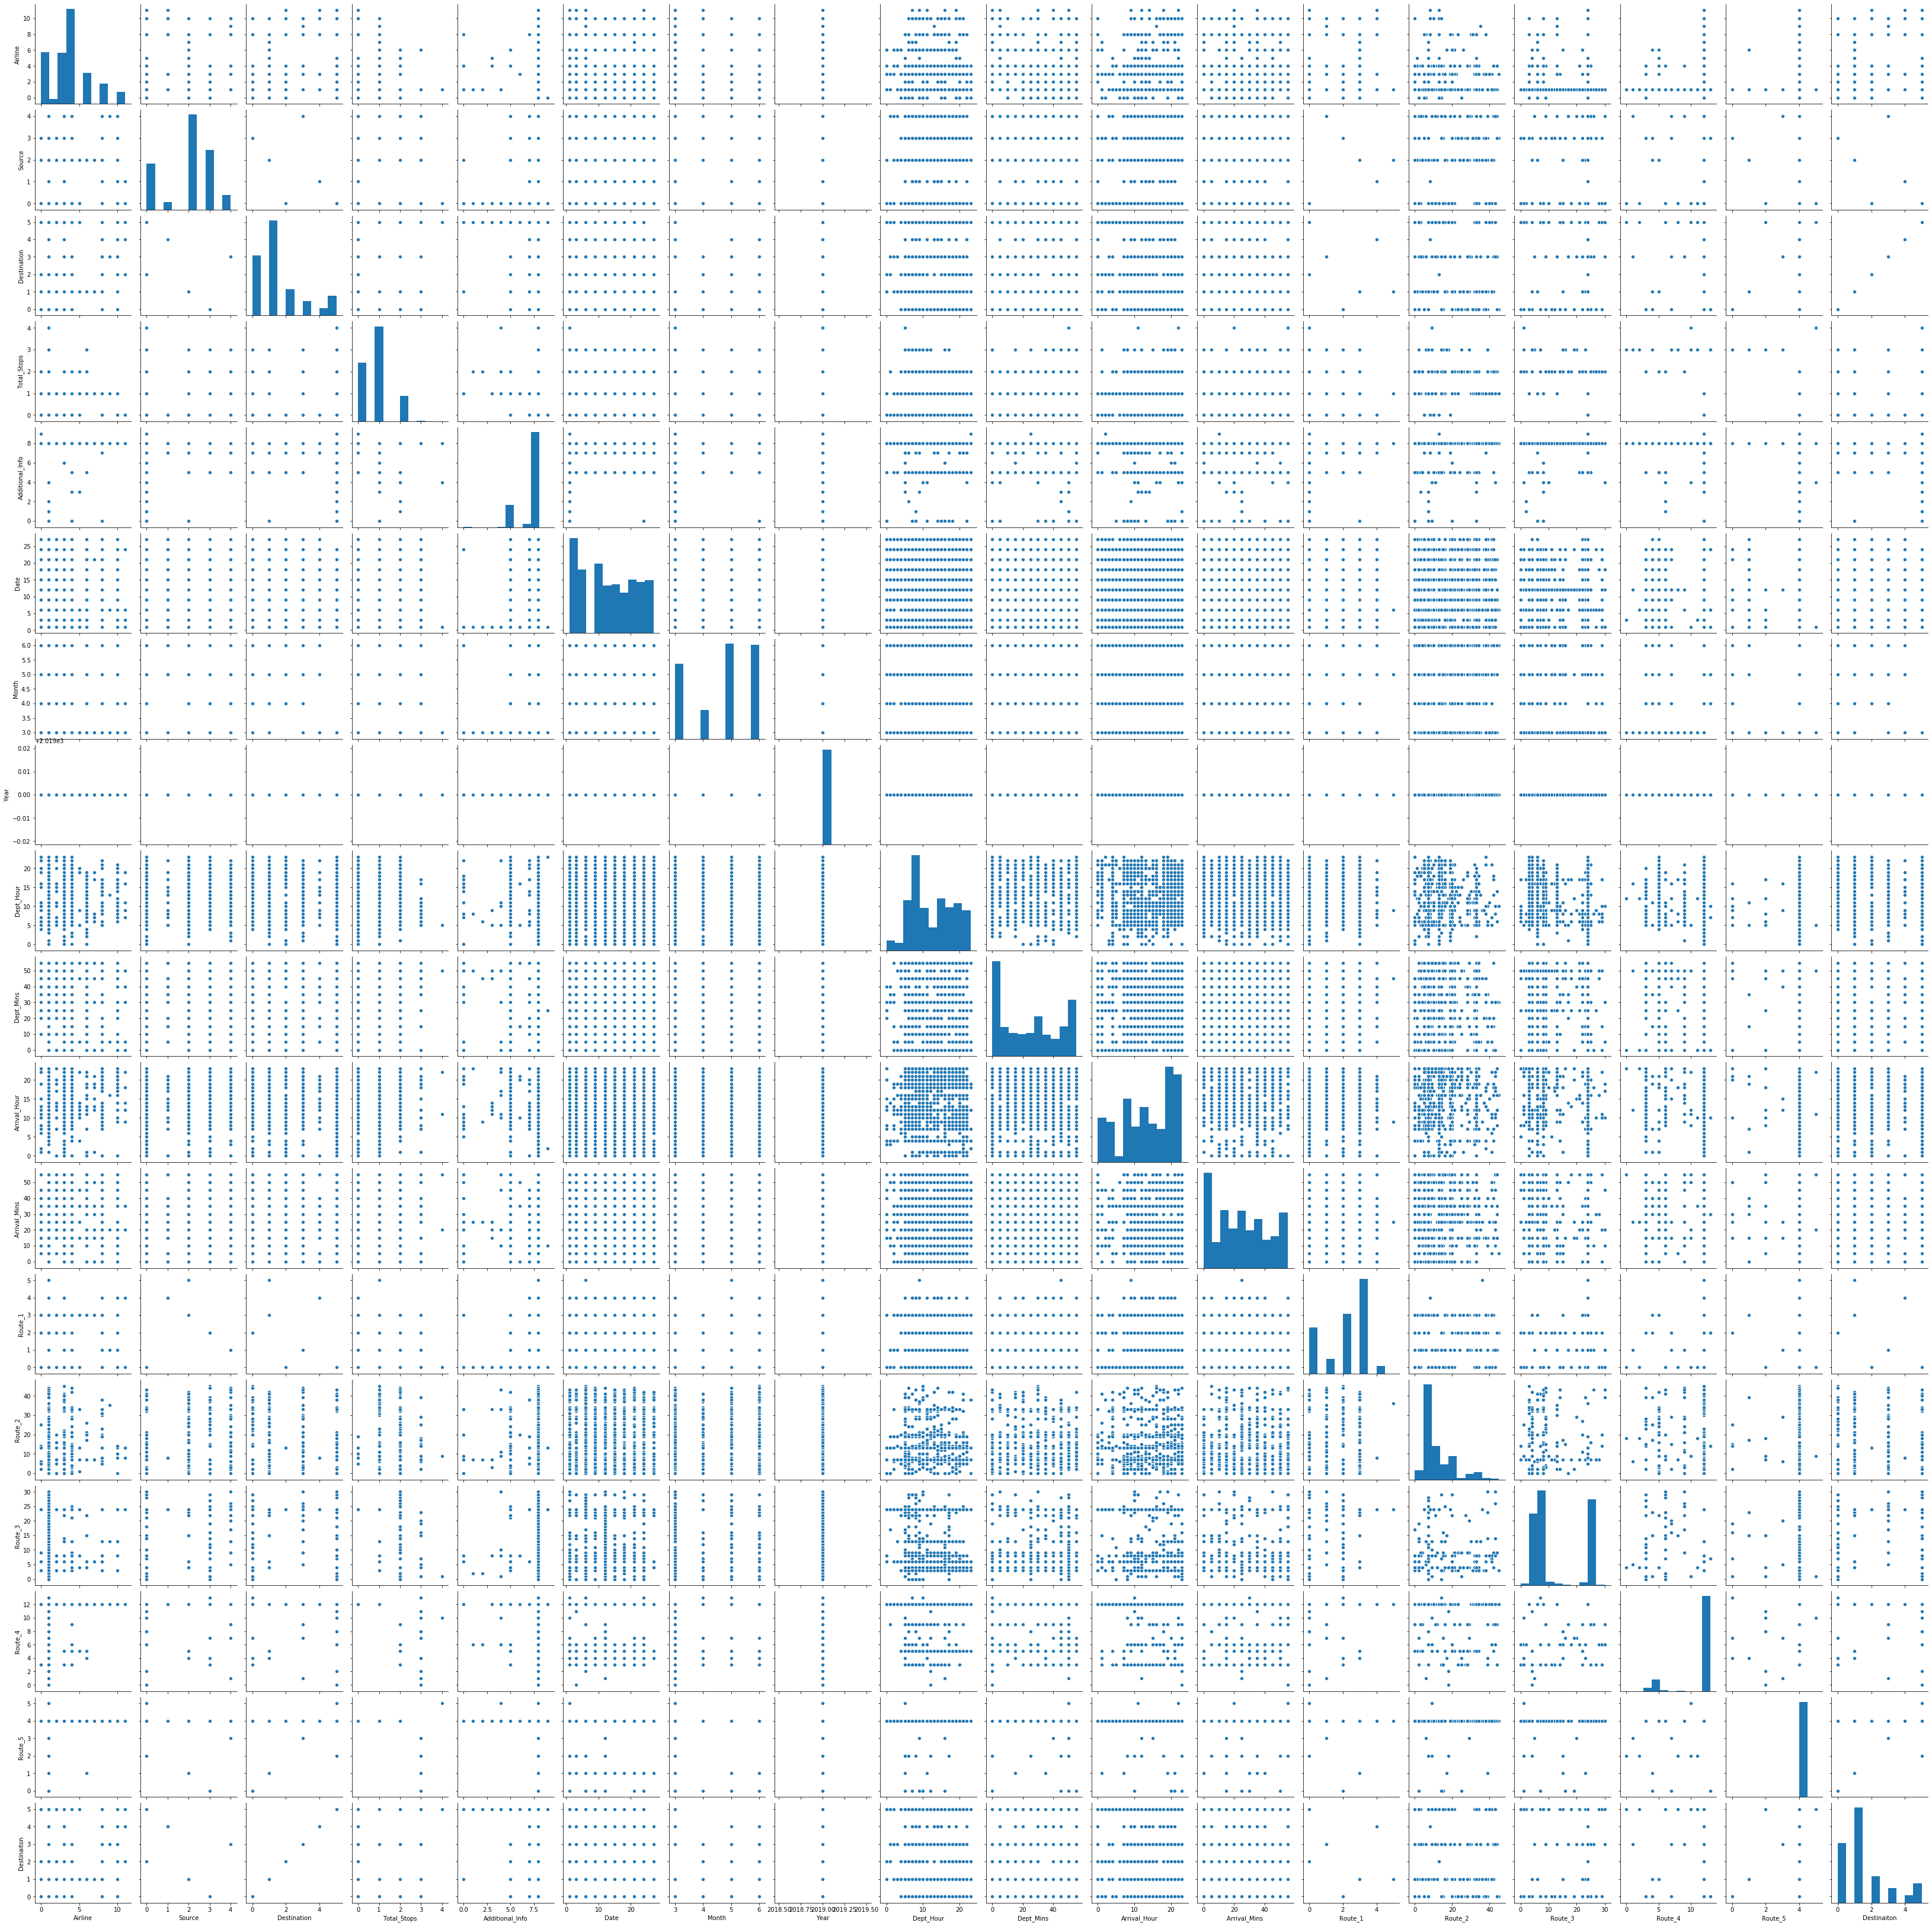

In [134]:
sns.pairplot(big_data)

In [151]:
df_train = big_data[0:10683]
df_test = big_data[10683:]

In [152]:
x = df_train.drop(['Price'],axis=1)
y = df_train['Price']

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.3)

In [154]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [155]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [156]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [157]:
selected_feat = x_train.columns[(model.get_support())]

In [158]:
selected_feat

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Dept_Hour', 'Dept_Mins ', 'Arrival_Hour',
       'Arrival_Mins ', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [159]:
x_train = x_train.drop(['Year'],axis=1)
x_test = x_test.drop(['Year'],axis=1)

### RANDOM FOREST REGRESSOR

In [170]:
params = {"n_estimators":[int(x) for x in np.linspace(start=100,stop=1500,num=15)],
          "max_features" : ["sqrt","auto","log2"],
          "max_depth" : [int(a) for a in np.linspace(start=5,stop=30,num=5)],
           "min_samples_leaf" : [1,2,3,4,5,6],
          "min_samples_split"  : [2,4,6,8,10,12,14]
         }

In [171]:
model = RandomForestRegressor()

In [173]:
randomSearchModel = RandomizedSearchCV(estimator=model, param_distributions=params,cv=5,n_jobs=-1,n_iter=50,random_state=42,scoring="neg_mean_squared_error")

In [174]:
randomSearchModel.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              